In [1]:
import os
os.chdir('../') # insures use of models folder as python module 
# Any figures saved or data pickled in the current working 
# directly will be saved up one folder from here.
import pybamm
import models
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] =  18.0

In [9]:
# Experimental cell capacity
cap = 0.211

# Current at 0.2C rate
I = -cap*0.1

# Instantiate the model
model_30 = models.Cornish2021_sigmoid()

# Obtain model parameter dictionary
param_30 = model_30.default_parameter_values

# Update the parameters for charge
param_30.update(
    {
        "Current function [A]": I,
        #"Shuttle rate coefficient during charge [s-1]": 0.0,
        #"alpha" : 1e5,
        #'gamma': .01,
        #"Initial Condition for Precipitated Sulfur [g]": 0.35
        "alpha" : 1e4,
        'gamma': 1e3,
        }
)

# Instantiate simulation object 
sim_30_cha1 = pybamm.Simulation(
    model_30,
    parameter_values = param_30,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

# Define the time cut-off for charging in second
time_in_seconds = 1.2*int(3600/0.1)

# Simulate the model 
sim_30_cha1.solve([0,500]);#time_in_seconds]);

for i in range(0,8):
    sim_30_cha1.step(5000)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

At t = 36499.9, , mxstep steps taken before reaching tout.
At t = 36499.9, , mxstep steps taken before reaching tout.
At t = 36499.9, , mxstep steps taken before reaching tout.


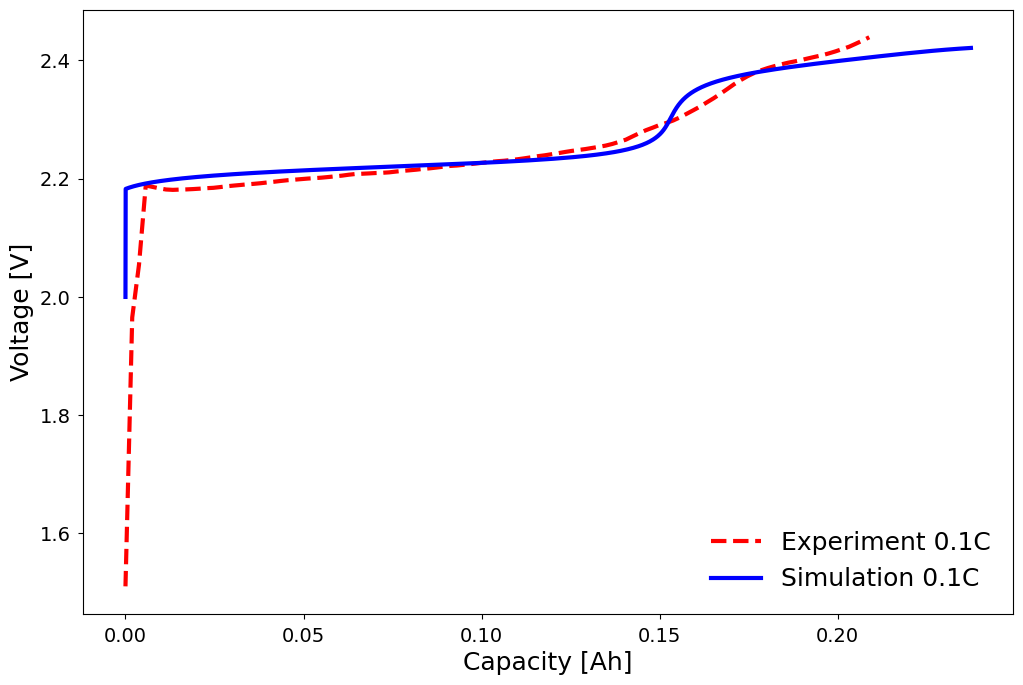

In [3]:
capacity = abs(I)*sim_30_cha1.solution.t/3600
voltage = sim_30_cha1.solution['Terminal voltage [V]'].entries

# get experimental data
filename = 'Cornish & Marinescu (2021)/Data/vol_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(charge_data['30']['capacity'],charge_data['30']['internal voltage'], linestyle='--')

plt.plot(capacity, voltage)
plt.legend(['Experiment 0.1C', 'Simulation 0.1C'], loc = 'lower right', frameon=False)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

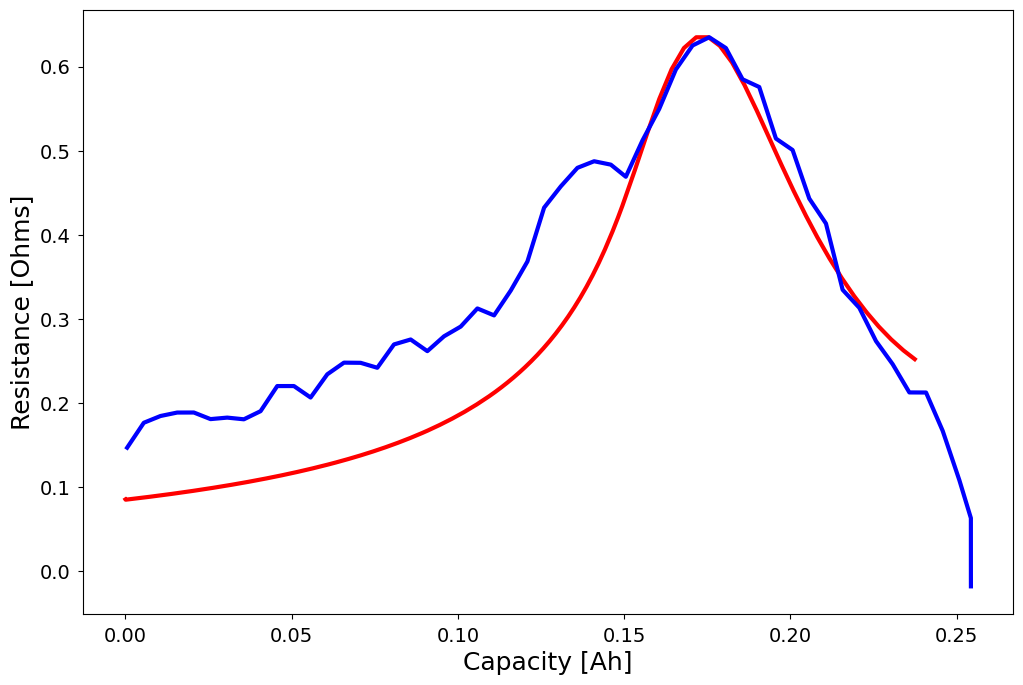

In [11]:
capacity = .0211*sim_30_cha1.solution.t/3600
S4 = sim_30_cha1.solution['S4 [g]'].entries
S2 = sim_30_cha1.solution['S2 [g]'].entries
S1 = sim_30_cha1.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 

filename = 'Cornish & Marinescu (2021)/Data/res_data'
#filename = '/Users/michaelcornish/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/red_data'

infile = open(filename,'rb')
res_data = pickle.load(infile)
infile.close()

res_discharge_data = res_data['discharge']
res_charge_data = res_data['charge']

beta1 = max(Li)*1.15
R = 1/(beta1-Li)
alpha1 = max(res_charge_data['30'][1])/max(R)
R *= alpha1

plt.plot(capacity,R)

plt.plot(res_charge_data['30'][0],res_charge_data['30'][1])

plt.xlabel('Capacity [Ah]')
plt.ylabel('Resistance [Ohms]');

In [12]:
loc = 0
S1_initial_cha = sim_30_cha1.solution['S [g]'].entries[loc]
S2_initial_cha = sim_30_cha1.solution['S2 [g]'].entries[loc]
S4_initial_cha = sim_30_cha1.solution['S4 [g]'].entries[loc]
S8_initial_cha = sim_30_cha1.solution['S8 [g]'].entries[loc]
Sp_initial_cha = sim_30_cha1.solution['Precipitated Sulfur [g]'].entries[loc]
print(S8_initial_cha)
print(S4_initial_cha)
print(S2_initial_cha)
print(S1_initial_cha)
print(Sp_initial_cha)

4.5372721447883005e-64
6.3812297536184095e-18
0.0131131458947208
0.001
0.43


In [13]:
loc = -1
S1_initial_dis = sim_30_cha1.solution['S [g]'].entries[loc]
S2_initial_dis = sim_30_cha1.solution['S2 [g]'].entries[loc]
S4_initial_dis = sim_30_cha1.solution['S4 [g]'].entries[loc]
S8_initial_dis = sim_30_cha1.solution['S8 [g]'].entries[loc]
Sp_initial_dis = sim_30_cha1.solution['Precipitated Sulfur [g]'].entries[loc]
V_initial = sim_30_cha1.solution['Terminal voltage [V]'].entries[loc]
cap_temp = sim_30_cha1.solution.t[loc]*0.0221/3600
print(S8_initial_dis)
print(S4_initial_dis)
print(S2_initial_dis)
print(S1_initial_dis)
print(Sp_initial_dis)
print(V_initial)
print(cap_temp)
print(charge_data['30']['capacity'][-1])

0.018702605092520346
0.23312954252797502
0.1892921693819182
3.5045333123957183e-10
0.0029888285418493694
2.4211536056377407
0.248625
0.20883138888888889


In [32]:
model_30_dis1 = models.Cornish2021_sigmoid()

param_30_dis1 = model_30_dis1.default_parameter_values
param_30_dis1.update(
    {
        "Current function [A]": 2*.0211,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Initial Condition for S8 ion [g]" : S8_initial_dis,
        "Initial Condition for S4 ion [g]" : S4_initial_dis,
        "Initial Condition for S2 ion [g]" : S2_initial_dis,
        "Initial Condition for S ion [g]" : S1_initial_dis,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial_dis,
        'Precipitation rate [s-1]': 100,
        "alpha" : 1e5,
        'gamma': 1
        
        }
)


sim_30_dis1 = pybamm.Simulation(
    model_30_dis1,
    parameter_values = param_30_dis1,
    solver=pybamm.CasadiSolver(
        atol=1e-8,
        rtol=1e-6,
        dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time = 0
sim_30_dis1.solve([0,4600])
print('\n\n\n\n\n\n\n\n\n done')
time = 4600
while time <= 6000:
    sim_30_dis1.step(.1)
    time += 0.1
    
time_in_seconds = 21001
while time < time_in_seconds:
    if round(time) % 1000 == 0 :
           print('\n\n\n\n' + str(100*time/time_in_seconds) + '\n\n\n\n')
    try:
        sim_30_dis1.step(1)
        time += 1
    except:
        break
        
        
print('\n\n\n\n\n\n\n\n\n done')

Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed











 done


CasADi - 2021-11-16 15:28:38 WARNING("roots:jac_f_z failed: NaN detected for output jac_x_x0, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]


SolverError: Could not find consistent states: Could not find acceptable solution: solver returned NaNs

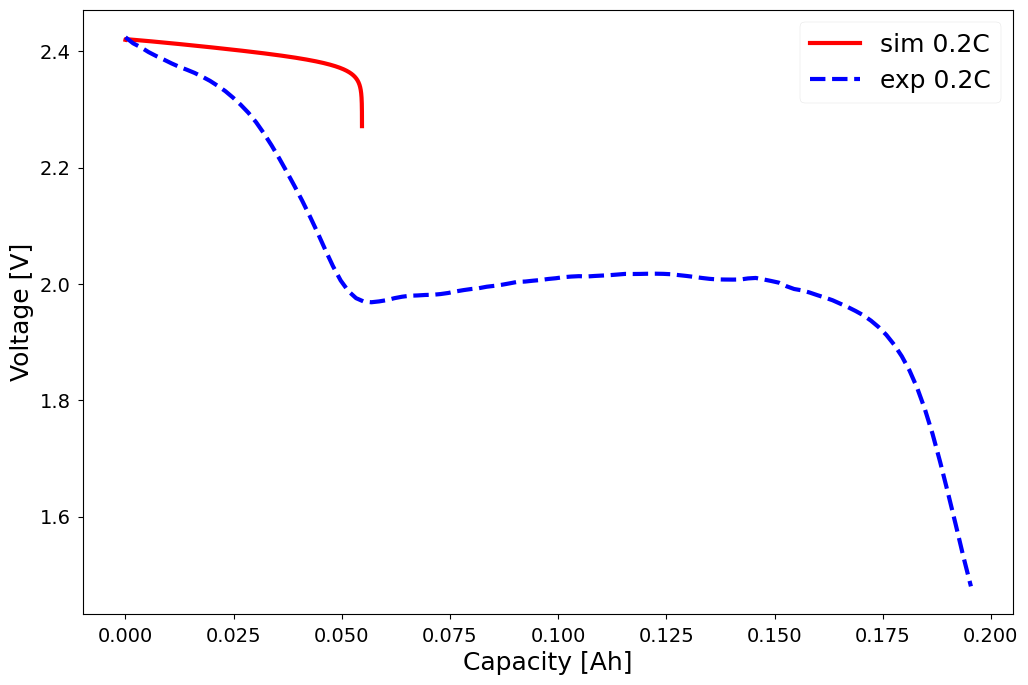

In [33]:
plt.plot(sim_30_dis1.solution.t*0.0422/3600, sim_30_dis1.solution['Terminal voltage [V]'].entries)

# get experimental data
filename = 'Cornish & Marinescu (2021)/Data/vol_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'],linestyle = '--')

plt.legend(["sim 0.2C","exp 0.2C" ])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

In [ ]:
loc = -1
S1_initial_cha = sim_30_dis1.solution['S [g]'].entries[loc]
S2_initial_cha = sim_30_dis1.solution['S2 [g]'].entries[loc]
S4_initial_cha = sim_30_dis1.solution['S4 [g]'].entries[loc]
S8_initial_cha = sim_30_dis1.solution['S8 [g]'].entries[loc]
Sp_initial_cha = sim_30_dis1.solution['Precipitated Sulfur [g]'].entries[loc]
print(S8_initial_cha)
print(S4_initial_cha)
print(S2_initial_cha)
print(S1_initial_cha)
print(Sp_initial_cha)

In [107]:
# Instantiate the model
model_30 = models.Cornish2021_sigmoid()

# Obtain model parameter dictionary
param_30 = model_30.default_parameter_values

# Update the parameters for charge
param_30.update(
    {
        "Current function [A]": I,
        "Shuttle rate coefficient during charge [s-1]": 1e-10,
        "Initial Condition for Terminal Voltage [V]": 1.8,
        "Initial Condition for S8 ion [g]" : S8_initial_cha,
        "Initial Condition for S4 ion [g]" : S4_initial_cha,
        "Initial Condition for S2 ion [g]" : S2_initial_cha,
        "Initial Condition for S ion [g]" : S1_initial_cha,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial_cha,
        "alpha" : 1e4,
        'gamma': 1
        }
)

# Instantiate simulation object 
sim_30_cha2 = pybamm.Simulation(
    model_30,
    parameter_values = param_30,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

# Define the time cut-off for charging in second
time_in_seconds = 1.2*int(3600/0.1)

# Simulate the model 
sim_30_cha2.solve([0,500]);#time_in_seconds]);

for i in range(0,45):
    sim_30_cha2.step(1000)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

At t = 27500, , mxstep steps taken before reaching tout.
At t = 28500, , mxstep steps taken before reaching tout.
At t = 29500, , mxstep steps taken before reaching tout.
At t = 30500, , mxstep steps taken before reaching tout.
At t = 31499.9, , mxstep steps taken before reaching tout.
At t = 32499.9, , mxstep steps taken before reaching tout.
At t = 33499.9, , mxstep steps taken before reaching tout.
At t = 34499.9, , mxstep steps taken before reaching tout.
At t = 35499.9, , mxstep steps taken before reaching tout.
At t = 36499.9, , mxstep steps taken before reaching tout.
At t = 37499.9, , mxstep steps taken before reaching tout.
At t = 38499.9, , mxstep steps taken before reaching tout.
At t = 39499.9, , mxstep steps taken before reaching tout.
At t = 40499.9, , mxstep steps taken before reaching tout.
At t = 41499.9, , mxstep steps taken before reaching tout.
At t = 42499.9, , mxstep steps taken before reaching tout.
At t = 43499.9, , mxstep steps taken before reaching tout.
At t 

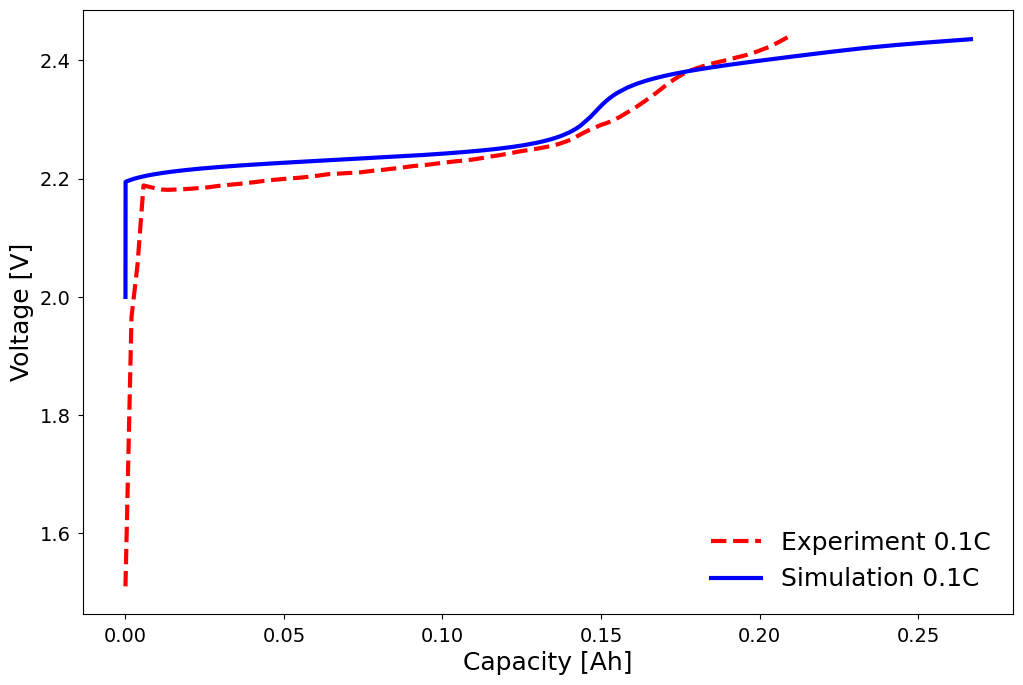

In [108]:
capacity = abs(I)*sim_30_cha2.solution.t/3600
voltage = sim_30_cha2.solution['Terminal voltage [V]'].entries

# get experimental data
filename = 'Cornish & Marinescu (2021)/Data/vol_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(charge_data['30']['capacity'],charge_data['30']['internal voltage'], linestyle='--')

plt.plot(capacity, voltage)
plt.legend(['Experiment 0.1C', 'Simulation 0.1C'], loc = 'lower right', frameon=False)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

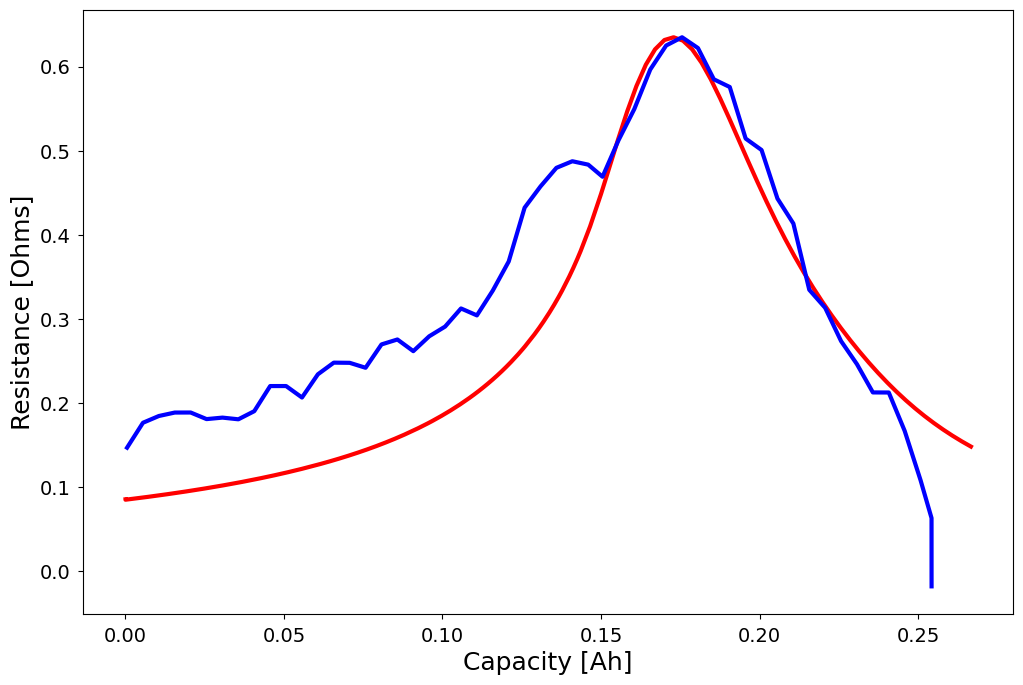

In [109]:
capacity = .0211*sim_30_cha2.solution.t/3600
S4 = sim_30_cha2.solution['S4 [g]'].entries
S2 = sim_30_cha2.solution['S2 [g]'].entries
S1 = sim_30_cha2.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 

filename = 'Cornish & Marinescu (2021)/Data/res_data'
#filename = '/Users/michaelcornish/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/red_data'

infile = open(filename,'rb')
res_data = pickle.load(infile)
infile.close()

res_discharge_data = res_data['discharge']
res_charge_data = res_data['charge']

R = 1/(beta1-Li)
R *= alpha1

plt.plot(capacity,R)

plt.plot(res_charge_data['30'][0],res_charge_data['30'][1])

plt.xlabel('Capacity [Ah]')
plt.ylabel('Resistance [Ohms]');

In [259]:
loc = -1
S1_initial_dis = sim_30_cha2.solution['S [g]'].entries[loc]*.75
S2_initial_dis = sim_30_cha2.solution['S2 [g]'].entries[loc]*.75
S4_initial_dis = sim_30_cha2.solution['S4 [g]'].entries[loc]*.75
S8_initial_dis = sim_30_cha2.solution['S8 [g]'].entries[loc]*.6
Sp_initial_dis = sim_30_cha2.solution['Precipitated Sulfur [g]'].entries[loc]*.75
V_initial = sim_30_cha2.solution['Terminal voltage [V]'].entries[loc]
cap_temp = sim_30_cha2.solution.t[loc]*0.0221/3600
print(S8_initial_dis)
print(S4_initial_dis)
print(S2_initial_dis)
print(S1_initial_dis)
print(Sp_initial_dis)
print(V_initial)
print(cap_temp)
print(charge_data['30']['capacity'][-1])

0.08427578546422561
0.15227876016331798
0.07467385046249803
1.4276311929381988e-09
0.0007875155372729332
2.4358752513113573
0.27931944444444445
0.20883138888888889


In [260]:
model_30_dis2 = models.Cornish2021_sigmoid()

param_30_dis2 = model_30_dis2.default_parameter_values
param_30_dis2.update(
    {
        "Current function [A]": 2*.0211,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Initial Condition for S8 ion [g]" : S8_initial_dis,
        "Initial Condition for S4 ion [g]" : S4_initial_dis,
        "Initial Condition for S2 ion [g]" : S2_initial_dis,
        "Initial Condition for S ion [g]" : S1_initial_dis,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial_dis,
        'Precipitation rate [s-1]': 100,
        "alpha" : 0.01,
        'gamma': 1,
        "Lower voltage cut-off [V]": 1
        
        }
)


sim_30_dis2 = pybamm.Simulation(
    model_30_dis1,
    parameter_values = param_30_dis2,
    solver=pybamm.CasadiSolver(
        atol=1e-8,
        rtol=1e-6,
        dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time = 0
sim_30_dis2.solve([0,5290])
print('\n\n\n\n\n\n\n\n\n done')


for i in range(0,200):
    sim_30_dis2.step(100)
'''
time = 5290
while time <= 6000:
    sim_30_dis1.step(.1)
    time += 0.1
    
time_in_seconds = 21001
while time < time_in_seconds:
    if round(time) % 1000 == 0 :
           print('\n\n\n\n' + str(100*time/time_in_seconds) + '\n\n\n\n')
    try:
        sim_30_dis1.step(1)
        time += 1
    except:
        break
'''
        
print('\n\n\n\n\n\n\n\n\n done')










 done


At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
psetup failed: KeyboardInterrupt
At t = 16096.7, , mxstep steps taken before reaching tout.











 done


At t = 16096.7, , mxstep steps taken before reaching tout.


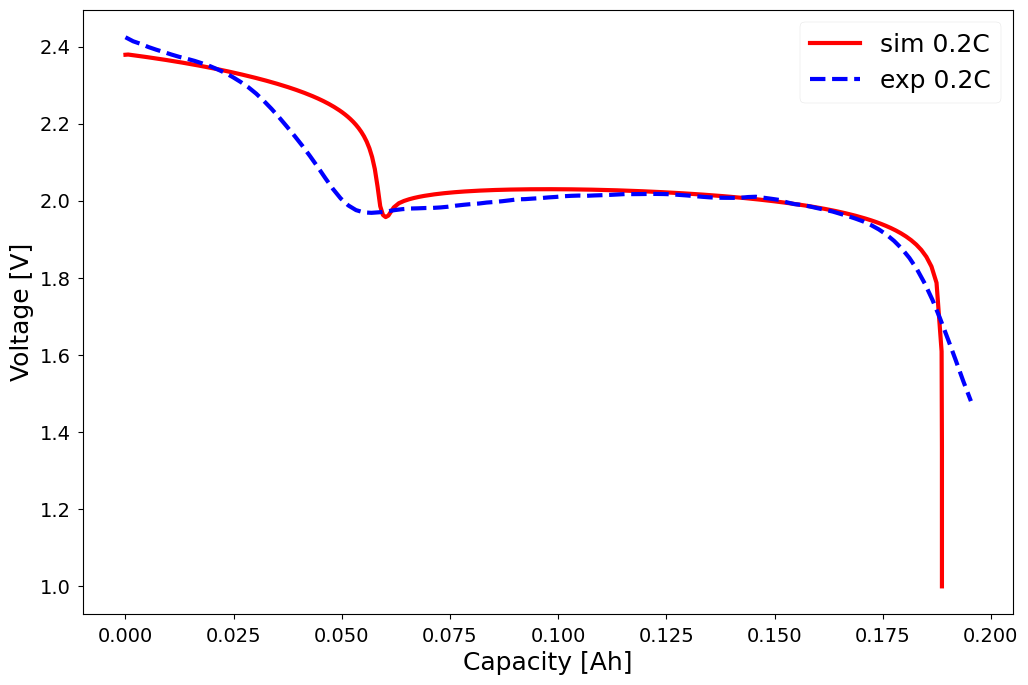

In [262]:
plt.plot(sim_30_dis2.solution.t*0.0422/3600, sim_30_dis2.solution['Terminal voltage [V]'].entries)

# get experimental data
filename = 'Cornish & Marinescu (2021)/Data/vol_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'],linestyle = '--')

plt.legend(["sim 0.2C","exp 0.2C" ])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

In [265]:
model_30_dis3 = models.Cornish2021_sigmoid()

param_30_dis3 = model_30_dis2.default_parameter_values
param_30_dis3.update(
    {
        "Current function [A]": 2*.0211,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Initial Condition for S8 ion [g]" : S8_initial_dis,
        "Initial Condition for S4 ion [g]" : S4_initial_dis,
        "Initial Condition for S2 ion [g]" : S2_initial_dis,
        "Initial Condition for S ion [g]" : S1_initial_dis,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial_dis,
        'Precipitation rate [s-1]': 100,
        "alpha" : 0.1,
        'gamma': 1,
        "Lower voltage cut-off [V]": 1
        
        }
)


sim_30_dis3 = pybamm.Simulation(
    model_30_dis1,
    parameter_values = param_30_dis3,
    solver=pybamm.CasadiSolver(
        atol=1e-8,
        rtol=1e-6,
        dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time = 0
sim_30_dis3.solve([0,5290])
print('\n\n\n\n\n\n\n\n\n done')


for i in range(0,200):
    sim_30_dis3.step(100)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed











 done


At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7, , mxstep steps taken before reaching tout.
At t = 16096.7 and h = 7.24502e-12, the error test faile

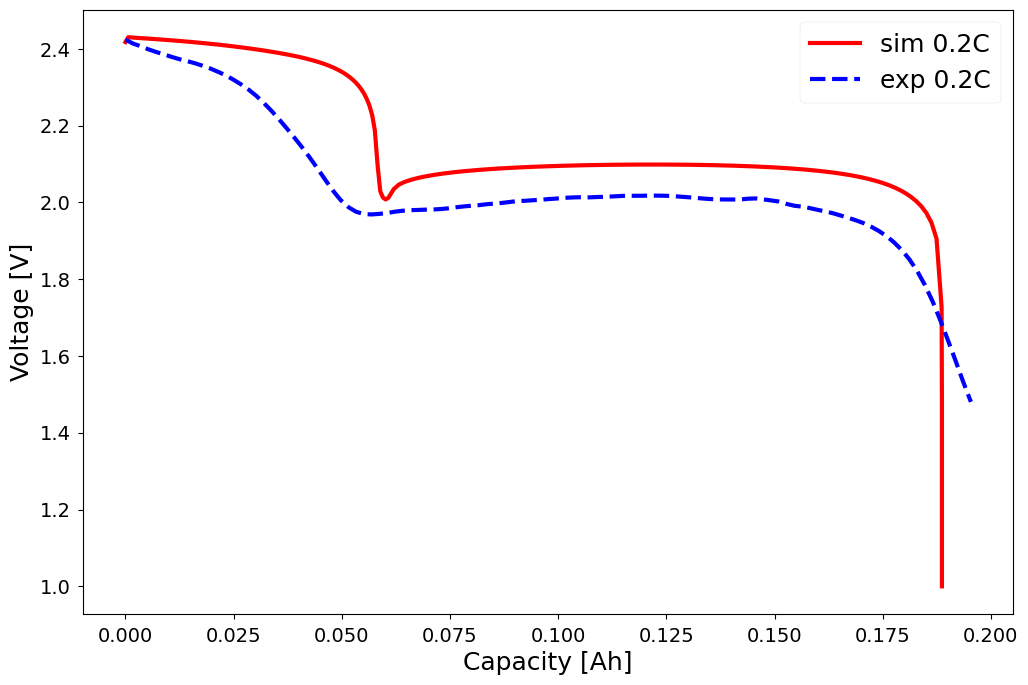

In [266]:
plt.plot(sim_30_dis3.solution.t*0.0422/3600, sim_30_dis3.solution['Terminal voltage [V]'].entries)

# get experimental data
filename = 'Cornish & Marinescu (2021)/Data/vol_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'],linestyle = '--')

plt.legend(["sim 0.2C","exp 0.2C" ])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

In [274]:
loc = -1
S1_initial_cha = sim_30_dis3.solution['S [g]'].entries[loc]
S2_initial_cha = sim_30_dis3.solution['S2 [g]'].entries[loc]
S4_initial_cha = sim_30_dis3.solution['S4 [g]'].entries[loc]
S8_initial_cha = sim_30_dis3.solution['S8 [g]'].entries[loc]
Sp_initial_cha = sim_30_dis3.solution['Precipitated Sulfur [g]'].entries[loc]
print(S8_initial_cha)
print(S4_initial_cha)
print(S2_initial_cha)
print(S1_initial_cha)
print(Sp_initial_cha)

# Instantiate the model
model_30 = models.Cornish2021_sigmoid()

# Obtain model parameter dictionary
param_30 = model_30.default_parameter_values

# Update the parameters for charge
param_30.update(
    {
        "Current function [A]": I,
        #"Shuttle rate coefficient during charge [s-1]": 1e-10,
        "Initial Condition for Terminal Voltage [V]": 1.5,
        "Initial Condition for S8 ion [g]" : S8_initial_cha,
        "Initial Condition for S4 ion [g]" : S4_initial_cha,
        "Initial Condition for S2 ion [g]" : S2_initial_cha,
        "Initial Condition for S ion [g]" : S1_initial_cha,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial_cha,
        #"Precipitation rate [s-1]": 1000,
        "alpha" : 1e-1,
        'gamma': 0
        }
)

# Instantiate simulation object 
sim_30_cha3 = pybamm.Simulation(
    model_30,
    parameter_values = param_30,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-6,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)

# Define the time cut-off for charging in second
time_in_seconds = 1.2*int(3600/0.1)

# Simulate the model 
sim_30_cha3.solve([0,5]);#time_in_seconds]);

for i in range(0,45):
    sim_30_cha3.step(1000)

2.58376888350717e-16
4.936929160650846e-16
2.2255678714639314e-09
2.14572655863294e-05
0.31199445356379113


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0 and h = 4.81654e-11, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casad

SolverError: Maximum number of decreased steps occurred at t=0.0. Try solving the model up to this time only or reducing dt_max (currently, dt_max=1.5567047427399158e-06).

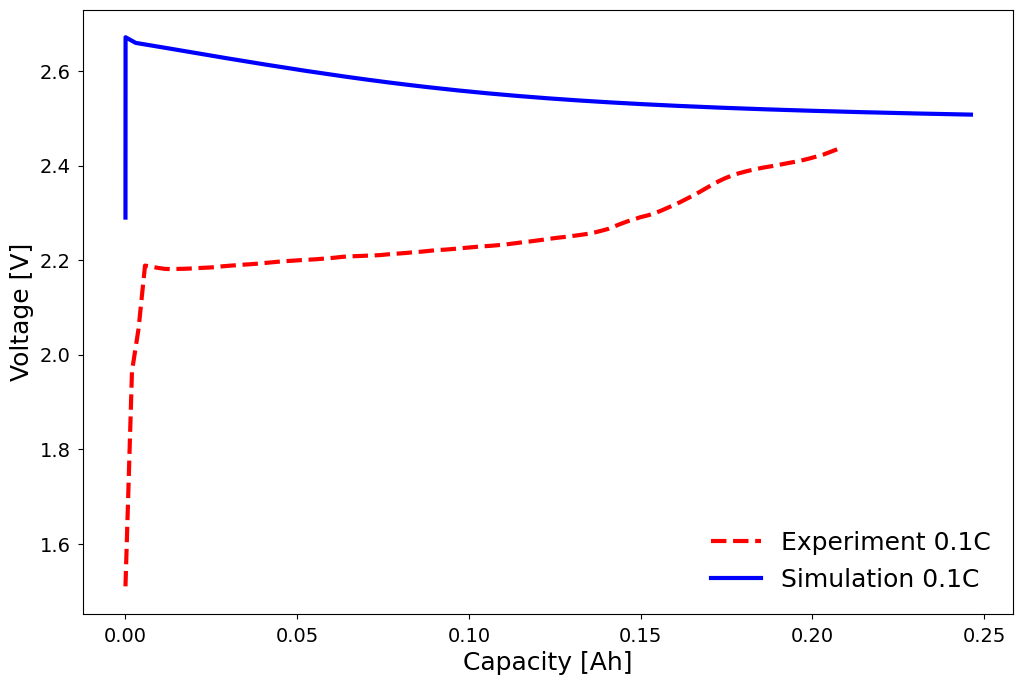

In [273]:
capacity = abs(I)*sim_30_cha3.solution.t/3600
voltage = sim_30_cha3.solution['Terminal voltage [V]'].entries

# get experimental data
filename = 'Cornish & Marinescu (2021)/Data/vol_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(charge_data['30']['capacity'],charge_data['30']['internal voltage'], linestyle='--')

plt.plot(capacity, voltage)
plt.legend(['Experiment 0.1C', 'Simulation 0.1C'], loc = 'lower right', frameon=False)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

In [19]:
model_30_dis2 = models.Cornish2021_sigmoid()

param_30_dis2 = model_30_dis2.default_parameter_values
param_30_dis2.update(
    {
        "Current function [A]": 2*.0211,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Initial Condition for S8 ion [g]" : S8_initial_dis,
        "Initial Condition for S4 ion [g]" : S4_initial_dis,
        "Initial Condition for S2 ion [g]" : S2_initial_dis,
        "Initial Condition for S ion [g]" : S1_initial_dis,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial_dis,
        'Precipitation rate [s-1]': 100,
        "alpha" : 0.01,
        'gamma': 1
        }
)


sim_30_dis2 = pybamm.Simulation(
    model_30_dis2,
    parameter_values = param_30_dis2,
    solver=pybamm.CasadiSolver(
        atol=1e-8,
        rtol=1e-6,
        dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time = 0
sim_30_dis2.solve([0,5290])
print('\n\n\n\n\n\n\n\n\n done')
time = 5290
while time <= 6000:
    sim_30_dis2.step(.1)
    time += 0.1
    
time_in_seconds = 21001
while time < time_in_seconds:
    if round(time) % 1000 == 0 :
           print('\n\n\n\n' + str(100*time/time_in_seconds) + '\n\n\n\n')
    try:
        sim_30_dis2.step(1)
        time += 1
    except:
        break
        
        
print('\n\n\n\n\n\n\n\n\n done')











 done




28.57006809200792








33.33174610734052








38.09342412267313








42.855102138005726








47.61678015333833








52.37845816867093








57.14013618400353








61.90181419933614








66.66349221466874








71.42517023000134








76.18684824533395








80.94852626066655








85.71020427599915








90.47188229133175








95.23356030666436








99.99523832199698













 done


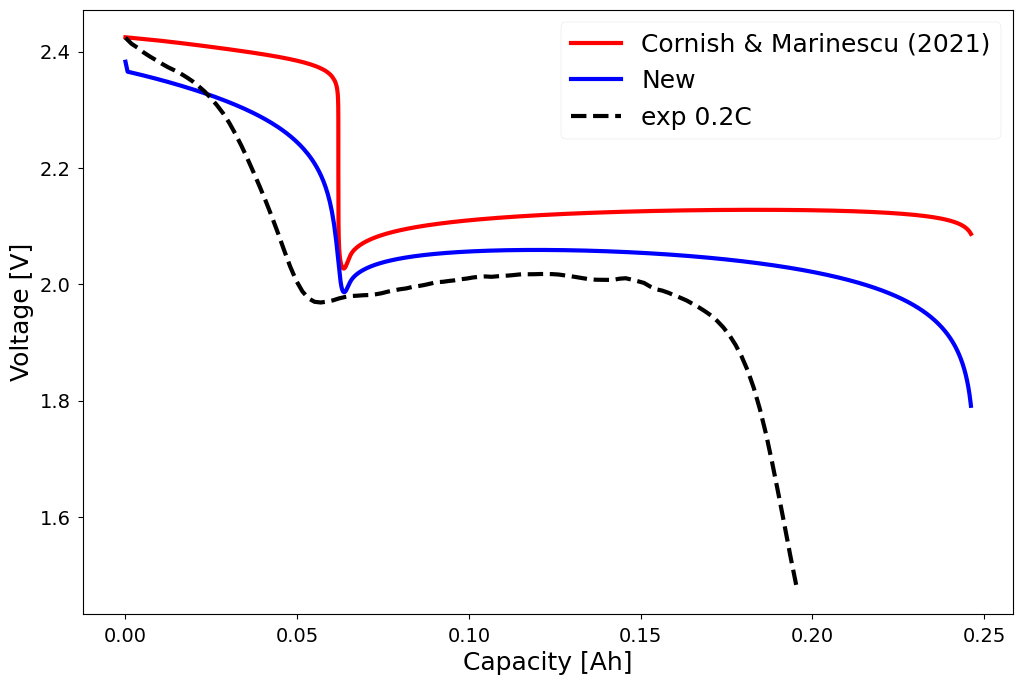

In [20]:
plt.plot(sim_30_dis1.solution.t*0.0422/3600, sim_30_dis1.solution['Terminal voltage [V]'].entries)
plt.plot(sim_30_dis2.solution.t*0.0422/3600, sim_30_dis2.solution['Terminal voltage [V]'].entries)
# get experimental data
filename = 'Cornish & Marinescu (2021)/Data/vol_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'],linestyle = '--')

plt.legend(["Cornish & Marinescu (2021)",
            "New",
            "exp 0.2C" ])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');

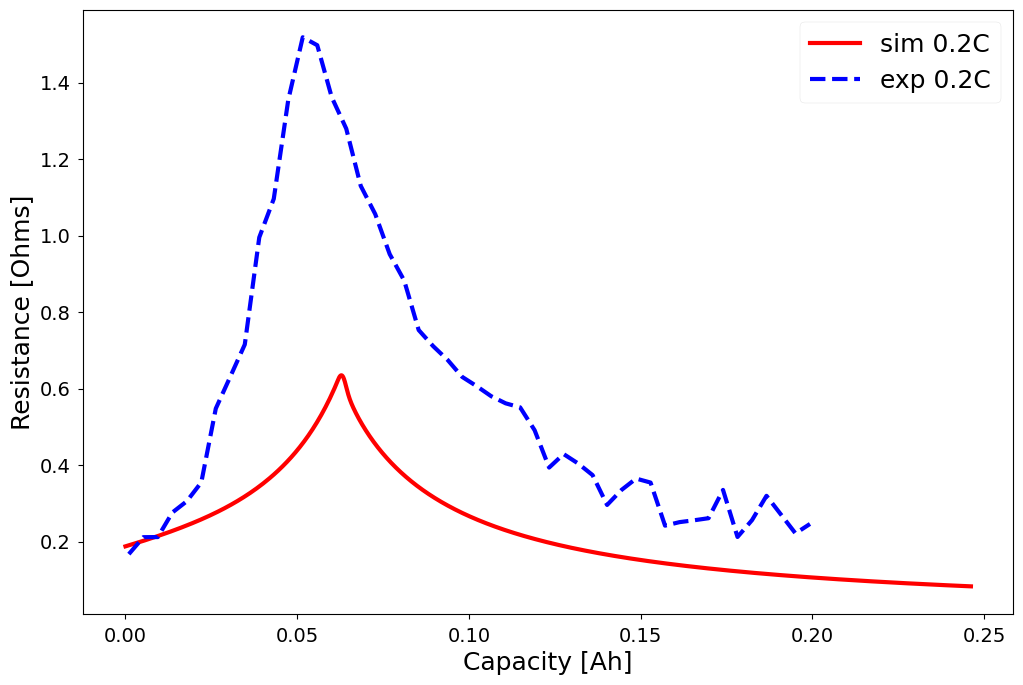

In [26]:


filename = 'Cornish & Marinescu (2021)/Data/res_data'
#filename = '/Users/michaelcornish/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/red_data'

infile = open(filename,'rb')
res_data = pickle.load(infile)
infile.close()

res_discharge_data = res_data['discharge']
res_charge_data = res_data['charge']

beta1 = max(Li)*1.15
R = 1/(beta1-Li)
alpha1 = max(res_charge_data['30'][1])/max(R)
R *= alpha1

capacity = 2*.0211*sim_30_dis1.solution.t/3600
S4 = sim_30_dis1.solution['S4 [g]'].entries
S2 = sim_30_dis1.solution['S2 [g]'].entries
S1 = sim_30_dis1.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 
R = alpha1/(beta1-Li)
plt.plot(capacity, R)

res_discharge_data = res_data['discharge']
res_charge_data = res_data['charge']

plt.plot(res_discharge_data['30'][0],res_discharge_data['30'][1], linestyle = '--')

#plt.ylim([0,2])
#plt.xlim([0,0.2])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Resistance [Ohms]')
plt.legend(["sim 0.2C","exp 0.2C" ]);

In [16]:
model_30_dis3 = models.Cornish2022()
factor = 1
param_30_dis3 = model_30_dis3.default_parameter_values
param_30_dis3.update(
    {
        "Current function [A]": 2*.0211,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        "Initial Condition for S8 ion [g]" : S8_initial_dis,
        "Initial Condition for S4 ion [g]" : S4_initial_dis,
        "Initial Condition for S2 ion [g]" : S2_initial_dis,
        "Initial Condition for S ion [g]" : S1_initial_dis,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial_dis,
        'Precipitation rate [s-1]': 100,
        "High Plateau S8 Stoch Coeff": -1*factor, 
        "High Plateau S4 Stoch Coeff": 2*factor, 
        "Middle Plateau S4 Stoch Coeff": -1*factor, 
        "Middle Plateau S2 Stoch Coeff": 2*factor, 
        "Low Plateau S2 Stoch Coeff": -1*factor, 
        "Low Plateau S1 Stoch Coeff": 2*factor, 
        "S8 Reference Cathodic":S8_initial_cha,
        "S4 Reference Cathodic":S8_initial_cha,
        "S2 Reference Cathodic":S8_initial_cha,
        "S1 Reference Cathodic":S8_initial_cha,
        "S8 Reference Anodic":S8_initial_dis,
        "S4 Reference Anodic":S8_initial_dis,
        "S2 Reference Anodic":S8_initial_dis,
        "S1 Reference Anodic":S8_initial_dis,
        "High Plateau Symmetry Factor": .5,
        "Middle Plateau Symmetry Factor": .5,
        "Low Plateau Symmetry Factor": .5,
        }
)


sim_30_dis3 = pybamm.Simulation(
    model_30_dis3,
    parameter_values = param_30_dis3,
    solver=pybamm.CasadiSolver(
        atol=1e-8,
        rtol=1e-6,
        dt_max = .01,
        #extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time = 0
first_end = 3700
second_end = 6000
sim_30_dis3.solve([0,first_end])
print('\n\n\n\n\n\n\n\n\n done')
time = first_end
while time <= second_end:
    try:
        sim_30_dis3.step(.01)
        time += 0.01
    except:
        break
time_in_seconds = 21001
while time < time_in_seconds:
    if round(time) % 1000 == 0 :
           print('\n\n\n\n' + str(100*time/time_in_seconds) + '\n\n\n\n')
    try:
        sim_30_dis3.step(1)
        time += 1
    except:
        break
        
        
print('\n\n\n\n\n\n\n\n\n done')

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c










 done









 done


In [ ]:
plt.plot(sim_30_dis1.solution.t*0.0422/3600, sim_30_dis1.solution['Terminal voltage [V]'].entries)
plt.plot(sim_30_dis2.solution.t*0.0422/3600, sim_30_dis2.solution['Terminal voltage [V]'].entries)
plt.plot(sim_30_dis3.solution.t*0.0422/3600, sim_30_dis3.solution['Terminal voltage [V]'].entries)
# get experimental data
filename = 'Cornish & Marinescu (2021)/Data/vol_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'],linestyle = '--')

plt.legend(["Cornish & Marinescu (2021)",
            "New",
            "Small Devitation from C&M 2011"
            "exp 0.2C" ])
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]');